In [2]:
from ultralytics import YOLO
import os
from utils import plot_BB_center

def grading(model, image_directory, output_directory):
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            results = model.predict(os.path.join(image_directory, filename), save=True, stream=True)
            txt_filename = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
            
            # Check if results have any detections
            detections = False
            for result in results:
                if len(result.boxes) > 0:
                    detections = True
                    result.save_txt(txt_filename)
                    break
            
            # If no detections, create an empty txt file
            if not detections:
                with open(txt_filename, 'w') as f:
                    f.write('')

In [4]:
model = YOLO("model_path/Yolov5m_Colab_18_05_2024_889_v3_Sone/train10/weights/best.pt")

# # IMPORTANT: do not delete => this is a bug model can't inference any multiplicative images
# model1 = YOLO("model_path/YOLOv8_Colab_30_04_2024_v2_Ha/weights/best.pt")

image_directory = 'FINAL_test/images'
output_directory = 'FINAL_test/labels/predict'
os.makedirs(output_directory, exist_ok=True)

In [5]:
grading(model, image_directory, output_directory)


image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-045.jpg: 896x1280 224 nom_chars, 4594.2ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-046.jpg: 864x1280 242 nom_chars, 4285.7ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-047.jpg: 864x1280 205 nom_chars, 4166.6ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-048.jpg: 896x1280 187 nom_chars, 4364.8ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-049.jpg: 896x1280 176 nom_chars, 4002.1ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-050.jpg: 864x1280 190 nom_chars, 3862.3ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0140-01-016.jpg: 1120x1280 66 nom_chars, 5685.2ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0140-01-017.jpg: 1120x1280 137 nom_chars, 5508.2ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0174-03-013.jpg: 1024x1280 300 n

FINAL_test/images\nlvnpf-0137-01-045.jpg


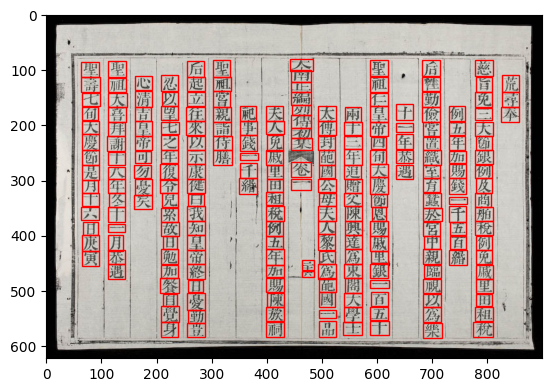

FINAL_test/images\nlvnpf-0137-01-046.jpg


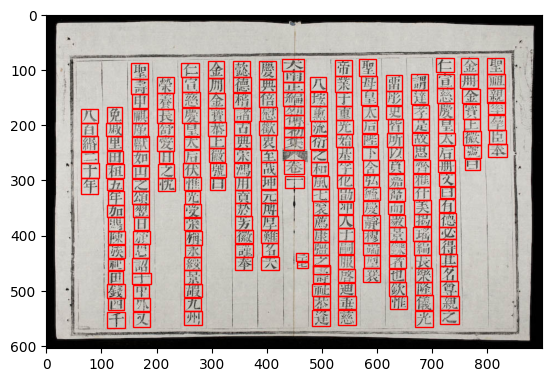

FINAL_test/images\nlvnpf-0137-01-047.jpg


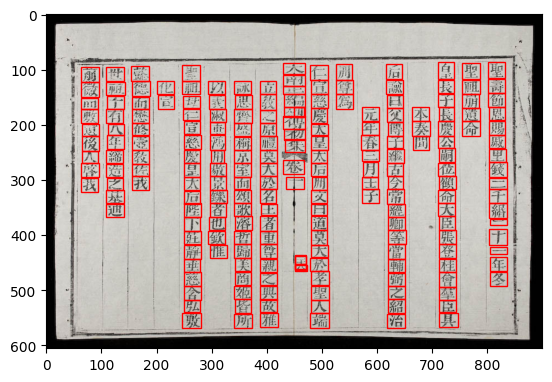

FINAL_test/images\nlvnpf-0137-01-048.jpg


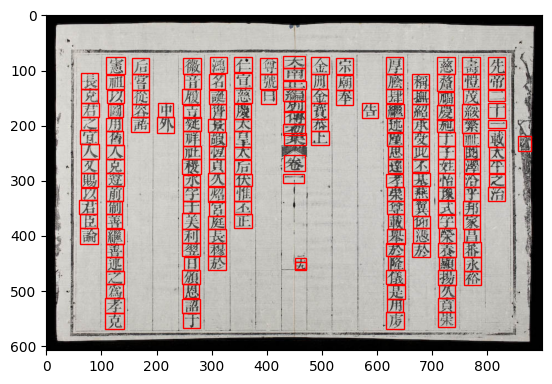

FINAL_test/images\nlvnpf-0137-01-049.jpg


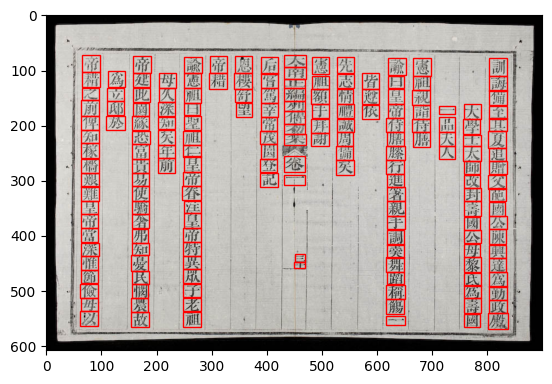

FINAL_test/images\nlvnpf-0137-01-050.jpg


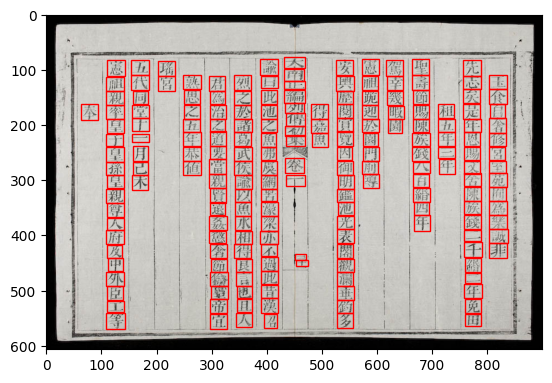

FINAL_test/images\nlvnpf-0140-01-016.jpg


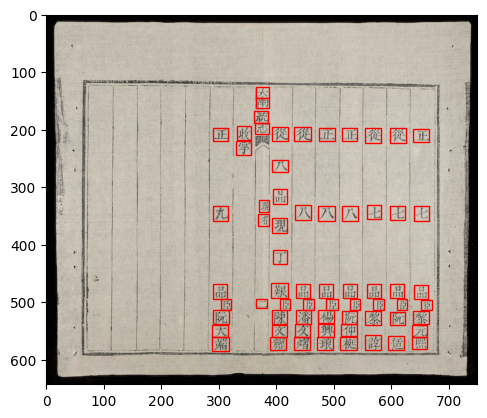

FINAL_test/images\nlvnpf-0140-01-017.jpg


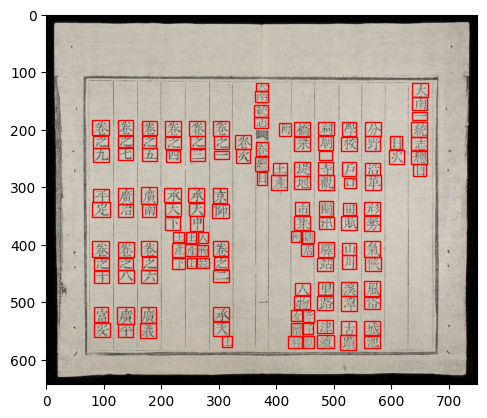

FINAL_test/images\nlvnpf-0174-03-013.jpg


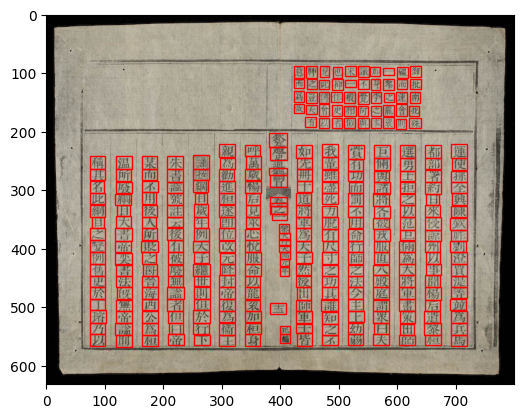

FINAL_test/images\nlvnpf-0174-03-014.jpg


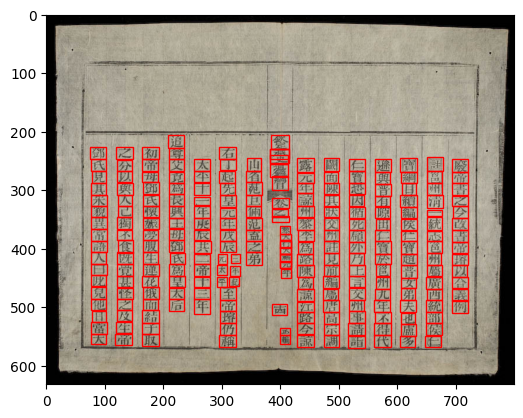

In [7]:
image_directory = 'FINAL_test/images'
output_directory = 'FINAL_test/labels/predict/CCWH'

# Plotting predicted bounding boxes with trained models on images
for filename in os.listdir(image_directory):
    img_pth = os.path.join(image_directory, filename)
    print(img_pth)
    coord_path = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
    plot_BB_center(img_pth, coord_path)

In [8]:
from utils import convert_coord

convert_coord("FINAL_test/labels/ground_truth/CCWH/", "FINAL_test/labels/ground_truth/LTRB/")
convert_coord("FINAL_test/labels/predict/CCWH/", "FINAL_test/labels/predict/LTRB/")

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# # Checking with a random image when it is rotated.
# img = cv2.imread("FINAL_test/images/nlvnpf-0059-002.jpg")
# def rotate_image(image, angle):
#     height = image.shape[0]
#     width = image.shape[1]
#     center = (width/2, height/2)
#     size = (width, height)
#     rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
#     res = cv2.warpAffine(image, rot_mat, size)
#     return res
    
# img_gray_rotated = rotate_image(img, 45)

# results = model.predict("FINAL_test/images/nlvnpf-0059-002.jpg")
# for result in results:
#     boxes = result.boxes  
#     conf_scores = boxes.conf
#     for i in range(len(boxes)):
#         if(conf_scores[i] > 0.7):
#             x1, y1, x2, y2 = boxes[i].xyxy[0].cpu().numpy().astype(int)
#             cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
#     plt.imshow(img)